## Linear Regression on Subsets

In [47]:
#import csv reader and ggplot library
library(readr)
library(ggplot2)

In [48]:
#make a variable for csv file
adsales <- read.csv("advertising.csv")

In [49]:
#Output column names
cat("Column names...", names(adsales), "\n", sep="\n")

Column names...
firm
year
week
quarter
sales
advertising




A function to show R-squares, slope, intercept and P value.

In [50]:
RegressionData <- function (fit) {

  cat("\n", "Fit Data...")
    
  cat("\n", "Adj R2 = ",signif(summary(fit)$adj.r.squared, 5), "\n",
      "Intercept =",signif(fit$coef[[1]],5 ), "\n",
      "Slope =",signif(fit$coef[[2]], 5), "\n",
      "P value=",signif(summary(fit)$coef[2,4], 5))  

}

In [51]:
firm = adsales$"firm"
year = adsales$"year"
week = adsales$"week"
quarter = adsales$"quarter"
sales = adsales$"sales"
advertising = adsales$"advertising"

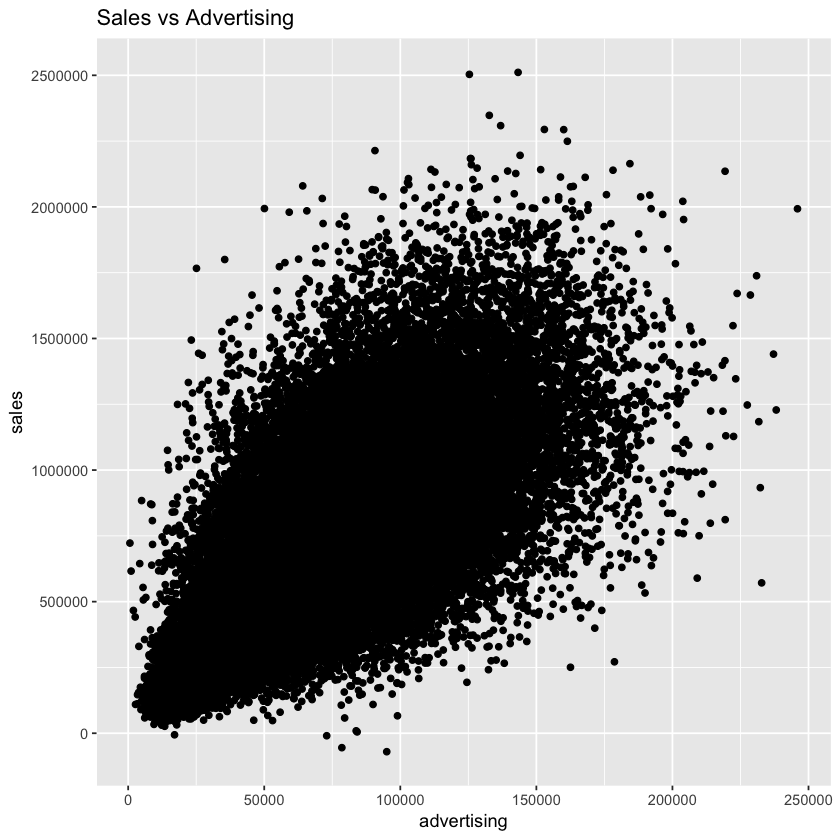

In [67]:
##just the scatter plot
ggplot(adsales, aes(x = advertising, y = sales), main='Sales vs Advertising') +
geom_point() +
ggtitle("Sales vs Advertising")


 Fit Data...
 Adj R2 =  0.49496 
 Intercept = 205470 
 Slope = 7.0543 
 P value= 0

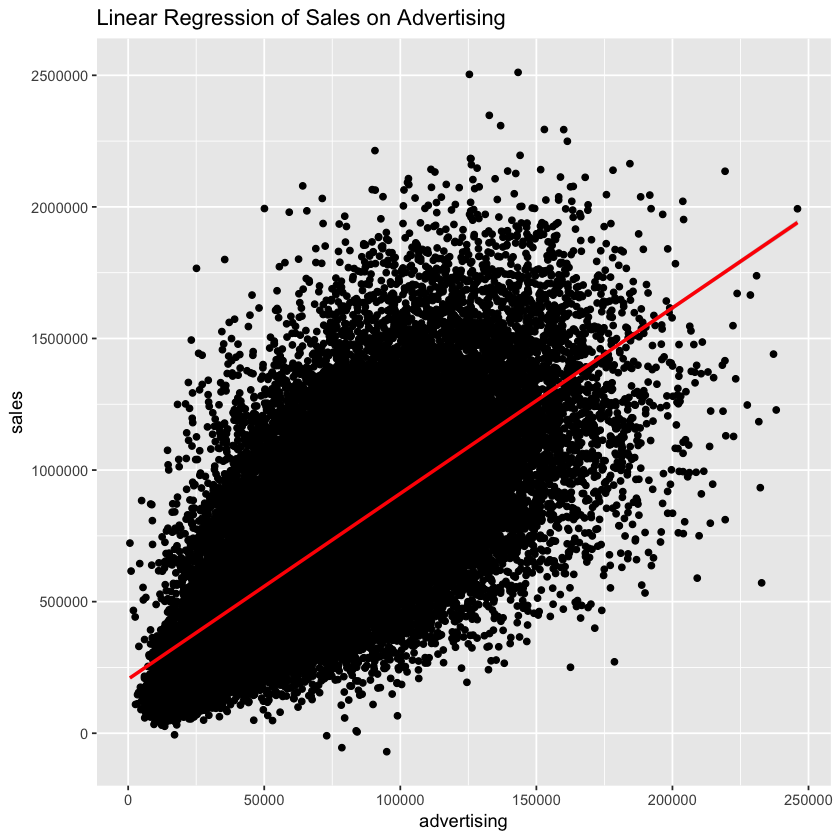

In [53]:
relation <- lm(sales~advertising)
ggplot(adsales, aes(x = advertising, y = sales), main='Linear Regression of Sales on Advertising') + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  ggtitle('Linear Regression of Sales on Advertising')
RegressionData(relation)

In [54]:
#creates dummy variable for the holidday season and shows table
adsales$holiday <- ifelse(adsales$quarter>3, 1, 0)
table(adsales$holiday)


    0     1 
39000 13000 

In [55]:
#calculates and prints mean of the sales not during the holiday season
sales.noholiday.mean <- mean(adsales$sales[adsales$holiday==0])
cat("Mean sales not during the holiday season:", sales.noholiday.mean)

Mean sales not during the holiday season: 609995.9

In [56]:
#calculates and prints mean of the sales not during the holiday season
sales.holiday.mean <- mean(adsales$sales[adsales$holiday==1])
cat("Mean sales during the holiday season:", sales.holiday.mean)

Mean sales during the holiday season: 1013845


 Fit Data...
 Adj R2 =  0.24544 
 Intercept = 610000 
 Slope = 403850 
 P value= 0

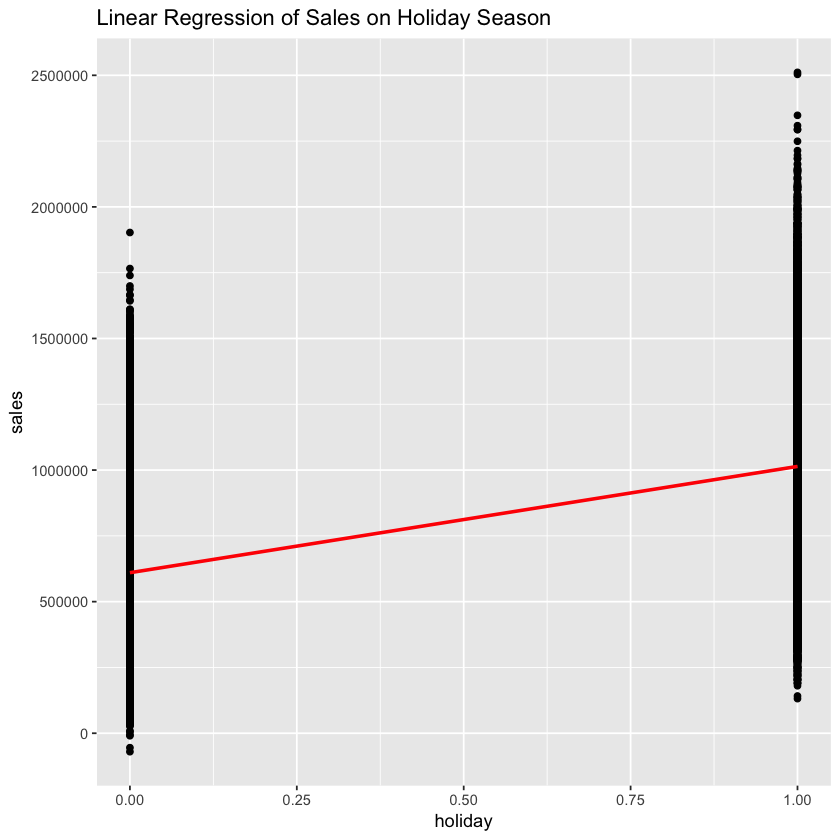

In [71]:
#does a linear regression on sales vs holidays
lm_sales <- lm(formula = sales ~ holiday, data=adsales)
ggplot(adsales, aes(x = holiday, y = sales), main='Linear Regression of Sales on Advertising') + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  ggtitle('Linear Regression of Sales on Holiday Season')
RegressionData(lm_sales)

In [68]:
#does a linear regression on sales vs advertising not on holiday season
lm_no <- lm(formula = sales~advertising, data=adsales, subset=(holiday==0))
RegressionData(lm_no)


 Fit Data...
 Adj R2 =  0.46295 
 Intercept = 189990 
 Slope = 6.8194 
 P value= 0

In [69]:
#does a linear regression on sales vs advertising on holiday season
lm_yes <- lm(formula = sales~advertising, data=adsales, subset=(holiday==1))
RegressionData(lm_yes)


 Fit Data...
 Adj R2 =  0.21332 
 Intercept = 541730 
 Slope = 4.635 
 P value= 0